In [11]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import joblib

In [12]:
df = sns.load_dataset('tips')
df.head()
print(df.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [13]:
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Numeric features: Index(['total_bill', 'tip', 'size'], dtype='object')
Categorical features: Index([], dtype='object')


In [14]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [15]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),      
    ("Outlier", LocalOutlierFactor(n_neighbors=20, contamination=0.1)) 
], verbose=True)

pipeline.fit(df)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing Outlier, total=   0.0s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['total_bill', 'tip', 'size'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('Outlier', LocalOutlierFactor(contamination=0.1))],
         verbose=True)

<Axes: ylabel='Density'>

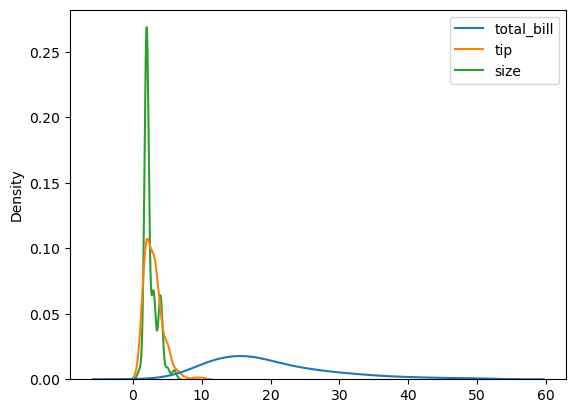

In [16]:
sns.kdeplot(df)

In [17]:
df_mod = pipeline[:-1].transform(df)
columns = pipeline[:-1].get_feature_names_out()
df_mod = pd.DataFrame(df_mod, columns=columns)

In [18]:
df_mod.head()

,num__total_bill,num__tip,num__size
0,-0.314711,-1.439947,-0.600193
1,-1.063235,-0.969205,0.453383
2,0.137780,0.363356,0.453383
3,0.438315,0.225754,-0.600193
4,0.540745,0.443020,1.506958


<Axes: ylabel='Density'>

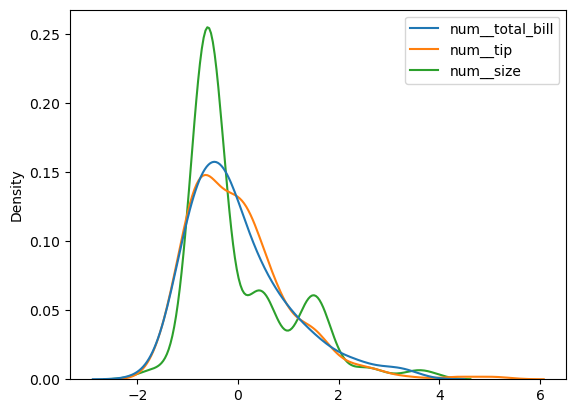

In [19]:
sns.kdeplot(df_mod)

In [20]:
joblib.dump(pipeline, "pipline.joblib")

['pipline.joblib']